In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import matplotlib.colors as mcolors

# 1. Fine-tuning

In [3]:
test_accuracies = [0.9030, 0.9274, 0.9331, 0.9292, 0.9301, 0.9397, 0.9414, 0.9366, 0.9392, 0.9441, 0.9406, 0.9379, 0.9432, 0.9353, 0.9458, 0.9392]
epochs = [291,66,44,36,31,25,27,24,23,22,22,22,23,34,21,22]
names = ["0", "4", "8", "12", "16", "20", "24", "28","32", "36", "40", "44", "48", "52", "56", "58"]

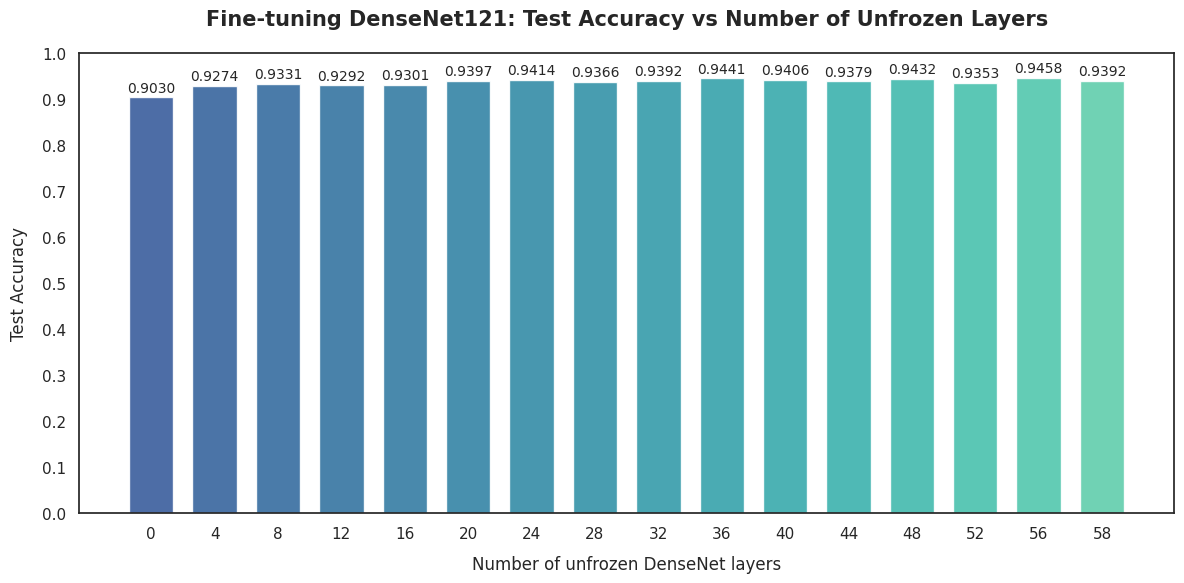

In [4]:
sns.set_theme(style="white", palette="viridis")

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, len(test_accuracies)))

plt.figure(figsize=(12,6))

bars = plt.bar(
    names,
    test_accuracies,
    color=colors,
    width=0.7,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)

plt.bar_label(bars, fmt='%.4f', padding=2, fontsize=10)

plt.title("Fine-tuning DenseNet121: Test Accuracy vs Number of Unfrozen Layers", fontsize=15, pad=20, fontweight='bold')
plt.ylabel("Test Accuracy", fontsize=12, labelpad=10)
plt.xlabel("Number of unfrozen DenseNet layers", fontsize=12, labelpad=10)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.tight_layout()
plt.show()

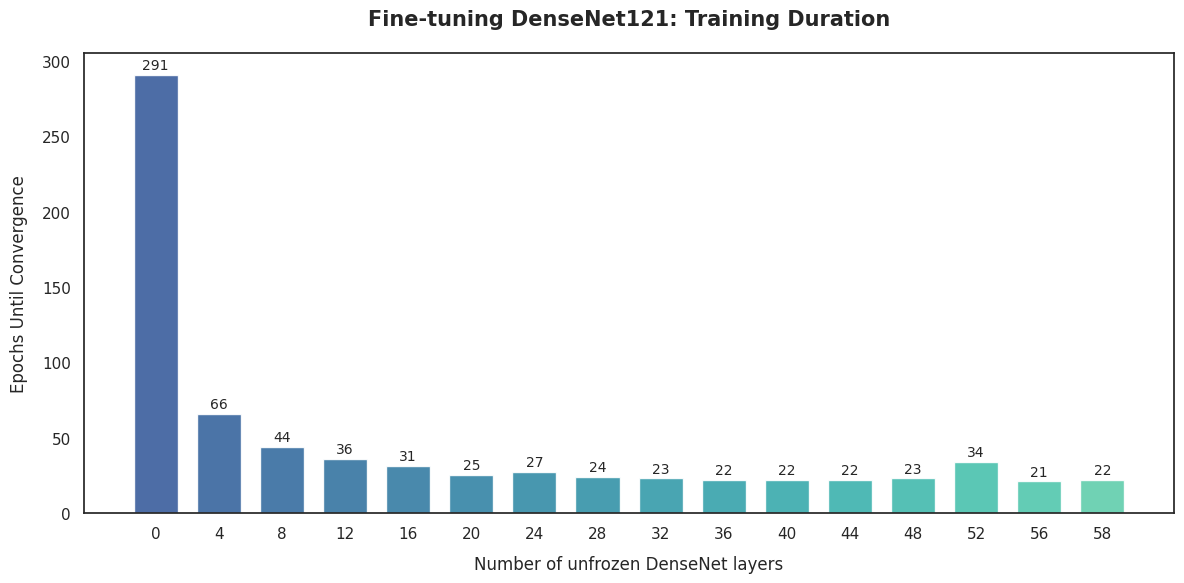

In [5]:
# Configuramos un estilo estético base
sns.set_theme(style="white", palette="viridis")

# Preparación de colores con un colormap real de matplotlib
# Usamos 'mako' o 'viridis' que dan un look muy profesional
cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, len(epochs)))

plt.figure(figsize=(12, 6))

# Dibujar las barras con un ligero borde para mayor definición
bars = plt.bar(
    names,
    epochs,
    color=colors,
    width=0.7,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)

# Etiquetas de datos con mejor fuente
plt.bar_label(bars, fmt='%d', padding=2, fontsize=10)

# Personalización de títulos y ejes
plt.title("Fine-tuning DenseNet121: Training Duration", fontsize=15, pad=20, fontweight='bold')
plt.ylabel("Epochs Until Convergence", fontsize=12, labelpad=10)
plt.xlabel("Number of unfrozen DenseNet layers", fontsize=12, labelpad=10)


plt.tight_layout()
plt.show()

# 2. New models


In [6]:
df = pd.read_csv("wandb_export_2026-01-09T22_57_19.140+01_00.csv")
df.head()

,Step,Squeeze-and-Excitation Unfreezed WDA - test_accuracy,Squeeze-and-Excitation Unfreezed WDA - test_accuracy__MIN,Squeeze-and-Excitation Unfreezed WDA - test_accuracy__MAX,Squeeze-and-Excitation Unfreezed - test_accuracy,Squeeze-and-Excitation Unfreezed - test_accuracy__MIN,Squeeze-and-Excitation Unfreezed - test_accuracy__MAX,Add-New-Block Unfreezed WDA - test_accuracy,Add-New-Block Unfreezed WDA - test_accuracy__MIN,Add-New-Block Unfreezed WDA - test_accuracy__MAX,...,Remove-1-Block Unfreezed WDA - test_accuracy__MAX,Add-New-Block Unfreezed - test_accuracy,Add-New-Block Unfreezed - test_accuracy__MIN,Add-New-Block Unfreezed - test_accuracy__MAX,Remove-2-Blocks Unfreezed - test_accuracy,Remove-2-Blocks Unfreezed - test_accuracy__MIN,Remove-2-Blocks Unfreezed - test_accuracy__MAX,Remove-1-Block Unfreezed - test_accuracy,Remove-1-Block Unfreezed - test_accuracy__MIN,Remove-1-Block Unfreezed - test_accuracy__MAX
0,0,0.210227,0.210227,0.210227,0.195367,0.195367,0.195367,0.673077,0.673077,0.673077,...,0.238636,0.543706,0.543706,0.543706,0.158217,0.158217,0.158217,0.328671,0.328671,0.328671
1,1,0.717657,0.717657,0.717657,0.683566,0.683566,0.683566,0.867570,0.867570,0.867570,...,0.630245,0.868881,0.868881,0.868881,0.315122,0.315122,0.315122,0.719843,0.719843,0.719843
2,2,0.865385,0.865385,0.865385,0.885927,0.885927,0.885927,0.902098,0.902098,0.902098,...,0.692745,0.917832,0.917832,0.917832,0.498252,0.498252,0.498252,0.824738,0.824738,0.824738
3,3,0.915210,0.915210,0.915210,0.920455,0.920455,0.920455,0.916958,0.916958,0.916958,...,0.763112,0.940997,0.940997,0.940997,0.592657,0.592657,0.592657,0.840035,0.840035,0.840035
4,4,0.929633,0.929633,0.929633,0.934878,0.934878,0.934878,0.925699,0.925699,0.925699,...,0.857955,0.944493,0.944493,0.944493,0.627185,0.627185,0.627185,0.883304,0.883304,0.883304


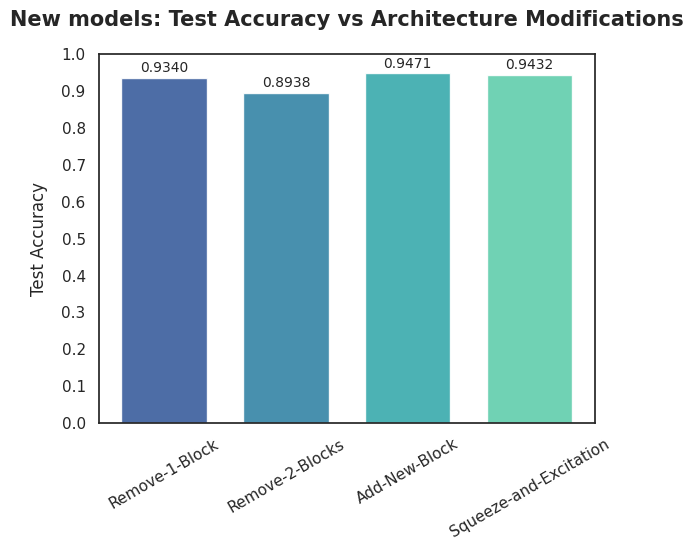

In [7]:
sns.set_theme(style="white", palette="viridis")
names = ["Remove-1-Block", "Remove-2-Blocks", "Add-New-Block", "Squeeze-and-Excitation"]
accuracies = []

for name in names:
    accuracies.append(df[name + " Unfreezed - test_accuracy"].max())

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, len(accuracies)))
    
bars = plt.bar(
    names,
    accuracies,
    color=colors,
    width=0.7,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)
plt.bar_label(bars, fmt='%.4f', padding=2, fontsize=10)
plt.ylabel("Test Accuracy", fontsize=12, labelpad=10)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xticks(rotation=30)
plt.title("New models: Test Accuracy vs Architecture Modifications", fontsize=15, pad=20, fontweight='bold')
plt.show()

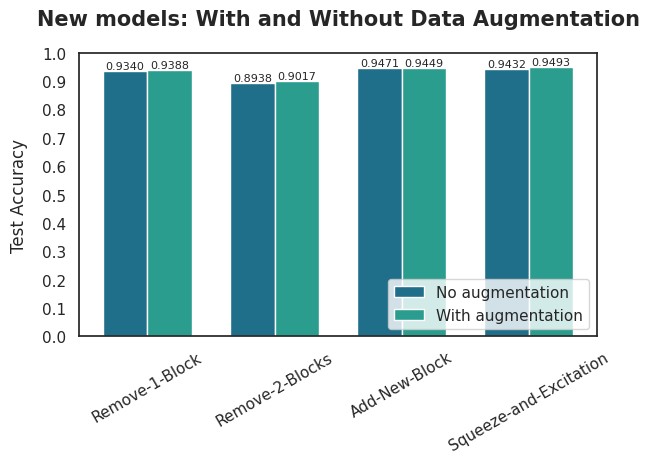

In [8]:
sns.set_theme(style="white", palette="viridis")
names = ["Remove-1-Block", "Remove-2-Blocks", "Add-New-Block", "Squeeze-and-Excitation"]
accuracies_no_WDA = []
accuracies_WDA = []

for name in names:
    accuracies_no_WDA.append(df[name + " Unfreezed - test_accuracy"].max())
    accuracies_WDA.append(df[name + " Unfreezed WDA - test_accuracy"].max())
    
x = np.arange(len(names))   # label locations
width = 0.35                 # width of the bars

plt.figure()
bars1 = plt.bar(x - width/2, accuracies_no_WDA, width, label="No augmentation", color="#1f6f8b")
bars2= plt.bar(x + width/2, accuracies_WDA, width, label="With augmentation", color="#2a9d8f")
plt.bar_label(bars1, fmt='%.4f', padding=0, fontsize=8)
plt.bar_label(bars2, fmt='%.4f', padding=0, fontsize=8)

# plt.xlabel("Model")
plt.xticks(rotation=30)
plt.ylabel("Test Accuracy", fontsize=12, labelpad=10)
plt.title("New models: With and Without Data Augmentation", fontsize=15, pad=20, fontweight='bold')
plt.xticks(x, names)
plt.legend(loc="lower right")

plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.tight_layout()
plt.show()

In [13]:
df = pd.read_csv("wandb_export_2026-01-11T16_43_00.939+01_00.csv")

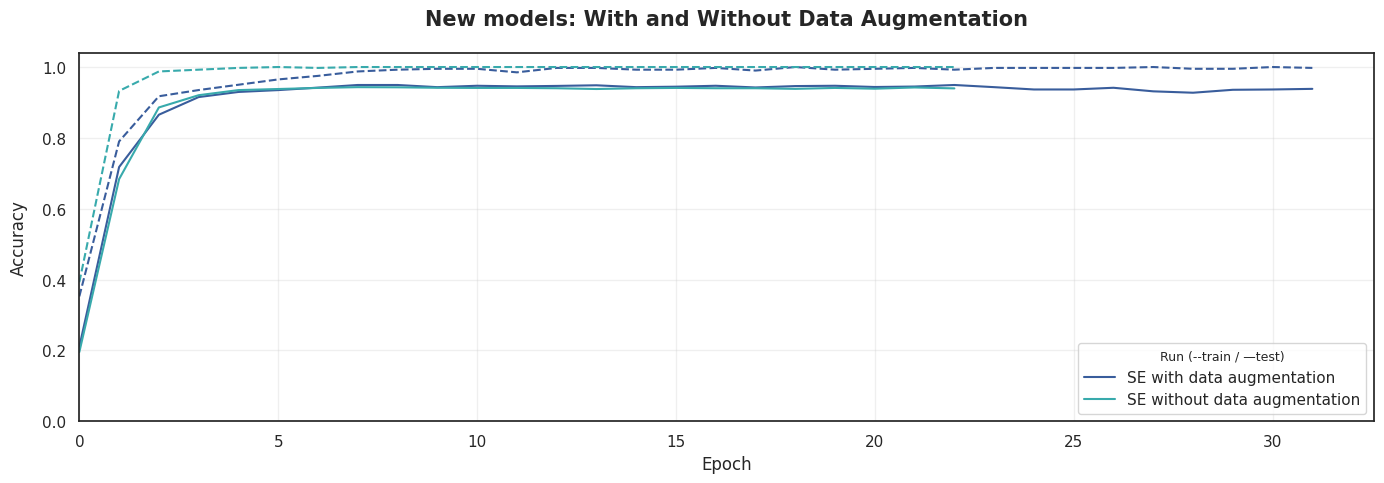

In [24]:
plt.figure(figsize=(14, 5))

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, 4))

plt.plot(df['Step'], df["Squeeze-and-Excitation Unfreezed WDA - test_accuracy"],  label=f"SE with data augmentation", color=colors[0])
plt.plot(df['Step'], df["Squeeze-and-Excitation Unfreezed WDA - train_accuracy"], linestyle="--", color=colors[0])
plt.plot(df['Step'], df["Squeeze-and-Excitation Unfreezed - test_accuracy"],  label=f"SE without data augmentation", color=colors[2])
plt.plot(df['Step'], df["Squeeze-and-Excitation Unfreezed - train_accuracy"], linestyle="--", color=colors[2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys(), title="Run (--train / —test)", loc='lower right')
plt.setp(legend.get_title(), fontsize=9)
plt.title("New models: With and Without Data Augmentation", fontsize=15, pad=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, labelpad=10)
plt.xlabel("Epoch")
plt.xlim(left=0)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

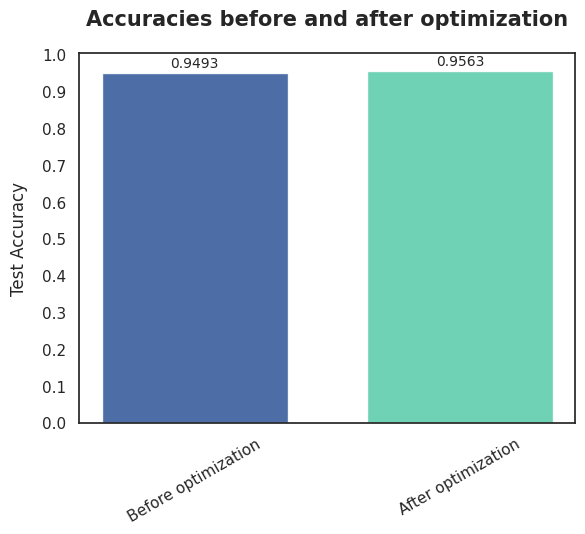

In [30]:
sns.set_theme(style="white", palette="viridis")
names = ["Before optimization", "After optimization"]
accuracies = [0.9493, 0.9562937062937062]

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, 2))
    
bars = plt.bar(
    names,
    accuracies,
    color=colors,
    width=0.7,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)
plt.bar_label(bars, fmt='%.4f', padding=2, fontsize=10)
plt.ylabel("Test Accuracy", fontsize=12, labelpad=10)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xticks(rotation=30)
plt.title("Accuracies before and after optimization", fontsize=15, pad=20, fontweight='bold')
# plt.tight_layout()
plt.show()

In [32]:
df = pd.read_csv("wandb_export_2026-01-11T17_39_03.742+01_00.csv")
df.head()

,Step,Sweep run - train_accuracy,Sweep run - train_accuracy__MIN,Sweep run - train_accuracy__MAX,Sweep run - test_accuracy,Sweep run - test_accuracy__MIN,Sweep run - test_accuracy__MAX,Squeeze-and-Excitation Unfreezed WDA - train_accuracy,Squeeze-and-Excitation Unfreezed WDA - train_accuracy__MIN,Squeeze-and-Excitation Unfreezed WDA - train_accuracy__MAX,Squeeze-and-Excitation Unfreezed WDA - test_accuracy,Squeeze-and-Excitation Unfreezed WDA - test_accuracy__MIN,Squeeze-and-Excitation Unfreezed WDA - test_accuracy__MAX
0,0,0.2000,0.2000,0.2000,0.122378,0.122378,0.122378,0.3525,0.3525,0.3525,0.210227,0.210227,0.210227
1,1,0.4450,0.4450,0.4450,0.492133,0.492133,0.492133,0.7900,0.7900,0.7900,0.717657,0.717657,0.717657
2,2,0.6625,0.6625,0.6625,0.685315,0.685315,0.685315,0.9175,0.9175,0.9175,0.865385,0.865385,0.865385
3,3,0.7475,0.7475,0.7475,0.780594,0.780594,0.780594,0.9350,0.9350,0.9350,0.915210,0.915210,0.915210
4,4,0.7850,0.7850,0.7850,0.825175,0.825175,0.825175,0.9500,0.9500,0.9500,0.929633,0.929633,0.929633


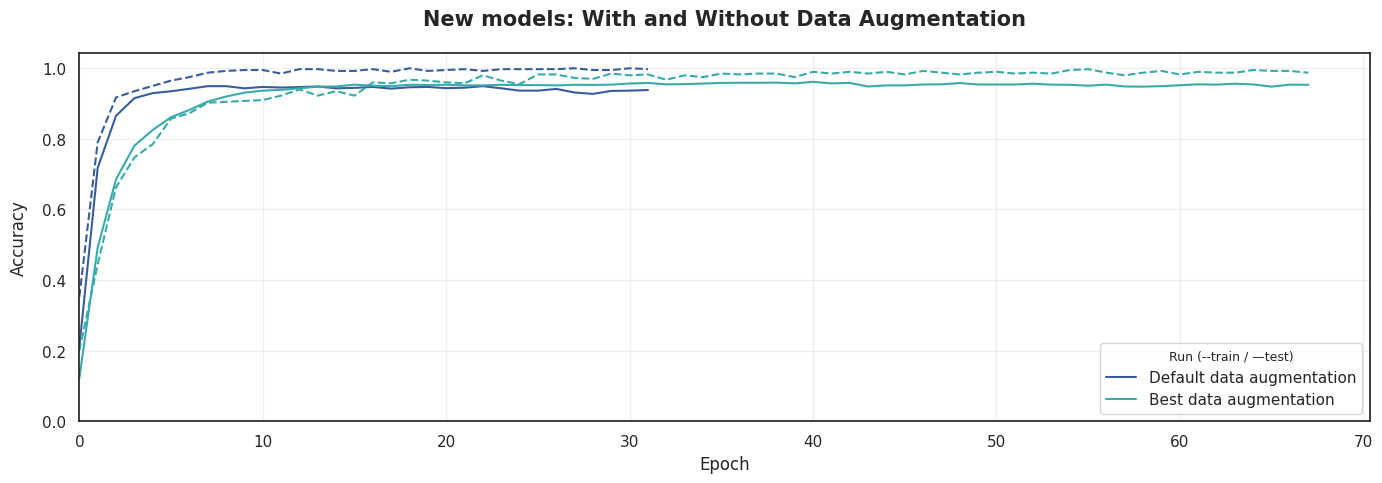

In [34]:
plt.figure(figsize=(14, 5))

cmap = plt.get_cmap('mako')
colors = cmap(np.linspace(0.4, 0.8, 4))

plt.plot(df['Step'], df["Squeeze-and-Excitation Unfreezed WDA - test_accuracy"],  label=f"Default data augmentation", color=colors[0])
plt.plot(df['Step'], df["Squeeze-and-Excitation Unfreezed WDA - train_accuracy"], linestyle="--", color=colors[0])
plt.plot(df['Step'], df["Sweep run - test_accuracy"],  label=f"Best data augmentation", color=colors[2])
plt.plot(df['Step'], df["Sweep run - train_accuracy"], linestyle="--", color=colors[2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys(), title="Run (--train / —test)", loc='lower right')
plt.setp(legend.get_title(), fontsize=9)
plt.title("New models: With and Without Data Augmentation", fontsize=15, pad=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, labelpad=10)
plt.xlabel("Epoch")
plt.xlim(left=0)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()